<a href="https://colab.research.google.com/github/cibele-vieira/customerchurn/blob/main/CustomerChurn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Bank Customer Churn Prediction
This notebook contains the full analysis and modeling pipeline described in the README.


In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("radheshyamkollipara/bank-customer-churn")

print("Path to dataset files:", path)

#dataset import from kaggle

Using Colab cache for faster access to the 'bank-customer-churn' dataset.
Path to dataset files: /kaggle/input/bank-customer-churn


In [4]:
# Import pandas library for data manipulation and analysis
import pandas as pd

# Import os library to interact with the operating system (file paths, directories)
import os

# Define the path where the Kaggle dataset was downloaded
dataset_path = "/kaggle/input/bank-customer-churn"

# List all files available in the dataset directory
# This helps confirm the exact file name
os.listdir(dataset_path)

# Load the CSV file into a pandas DataFrame
# This creates the main dataframe we will analyze
df = pd.read_csv(os.path.join(dataset_path, "Customer-Churn-Records.csv"))

In [5]:
# EDA
# Display the number of rows and columns in the dataset
# Format: (rows, columns)
df.shape

# Display the column names of the dataset
# Helps understand what features are available
df.columns

# Show dataset information:
# - data types
# - non-null counts
# - memory usage
df.info()

# Generate descriptive statistics for numerical columns
# Includes mean, std, min, max, quartiles
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


###  **Initial Exploratory Data Analysis (EDA) – Summary**

> The dataset contains **10,000 customer records and 18 features**, which is an adequate size for traditional machine learning models.
>
> No missing values were identified, eliminating the need for data imputation at this stage. The target variable **`Exited`**, which represents customer churn, shows that approximately **20% of customers have left the bank**, indicating a moderately imbalanced dataset — a common scenario in real-world churn problems.
>
> Several columns such as **RowNumber, CustomerId, and Surname** are purely identificational and do not carry predictive value; therefore, they should be removed before model training.
>
> The dataset includes a mix of **numerical**, **binary**, and **categorical** features. Categorical variables such as **Geography, Gender, and Card Type** will require encoding before being used in machine learning models.
>
> Overall, the dataset is clean, well-structured, and suitable for building a churn prediction model with minimal preprocessing.

Data Preprocessing

In [6]:
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"]) # these columns are not relevant for training


In [7]:
y = df["Exited"] #Exited is the dependent (target) variable representing customer churn
X = df.drop(columns=["Exited"])
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Card Type,Point Earned
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,2,DIAMOND,464
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,1,3,DIAMOND,456
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,3,DIAMOND,377
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0,5,GOLD,350
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,5,GOLD,425


In [8]:
from sklearn.model_selection import train_test_split #The data was split into features (X) and target (y), followed by a train-test split to ensure proper model evaluation.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape
X_test.shape
y_train.shape
y_test.shape


(2000,)

In [17]:
categorical_cols = ["Geografy","Gender","Card Type"] #Categorical variables were encoded and aligned to ensure numerical compatibility
X_train = pd.get_dummies(X_train, columns=categorical_cols,drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_cols,drop_first=True)
X_test = X_test.reindex(columns=Xtrain.columns, fill_value = 0)

KeyError: "['Geografy'] not in index"

In [18]:
X_train = X_train.drop(columns=["Complain"]) #The variable Complain shows an extremely high association with churn (99.5%), suggesting potential data leakage. Therefore, it should be carefully evaluated or excluded from predictive modeling.

The dataset was loaded and initially explored to understand its structure, features, and target variable.
Non-predictive identifier columns were removed to avoid data leakage.
The data was split into features (X) and target (y), followed by a train-test split to ensure proper model evaluation.
Categorical variables were encoded and aligned to ensure numerical compatibility.
The final dataset is fully prepared for machine learning model training.

Before training predictive models, an exploratory analysis was conducted to identify behavioral and demographic patterns among churned customers.

In [15]:
df.groupby("IsActiveMember")["Exited"].mean()


,Exited
IsActiveMember,
0,0.268715
1,0.142691


Inactive customers present a significantly higher churn rate (26.9%) compared
to active customers (14.3%), indicating that customer engagement is a strong factor associated with churn.

The variable Complain shows an extremely high association with churn (99.5%), suggesting potential data leakage. Therefore, it should be carefully evaluated or excluded from predictive modeling.



In [19]:
df.groupby("Complain")["Exited"].mean()


,Exited
Complain,
0,0.000503
1,0.995108


In [20]:
df.groupby("Gender")["Exited"].mean()

,Exited
Gender,
Female,0.250715
Male,0.164743


Female customers present a higher churn rate than male customers; however, gender is likely acting as a proxy variable rather than a direct cause of churn.

In [21]:
df.groupby("Geography")["Exited"].mean()


,Exited
Geography,
France,0.161747
Germany,0.324432
Spain,0.166734


Customers located in Germany exhibit a substantially higher churn rate (32.4%) compared to France and Spain (~16%), indicating a strong regional effect on customer attrition.

In [22]:
df["AgeGroup"] = pd.cut(
    df["Age"],
    bins=[18, 30, 40, 50, 60, 100],
    labels=["18-30", "31-40", "41-50", "51-60", "60+"]
)
df.groupby("AgeGroup")["Exited"].mean()

/tmp/ipython-input-2476298299.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("AgeGroup")["Exited"].mean()


,Exited
AgeGroup,
18-30,0.075026
31-40,0.121096
41-50,0.339655
51-60,0.562108
60+,0.247845


Churn rates increase significantly with age, peaking among customers aged 51–60 (56.2%), suggesting that middle-aged customers represent the highest-risk segment.

In [24]:
#AgeGroup × Geography (churn)
churn_age_geo = (
    df.groupby(["AgeGroup", "Geography"])["Exited"]
    .mean()
    .reset_index()
)

/tmp/ipython-input-2702300124.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["AgeGroup", "Geography"])["Exited"]


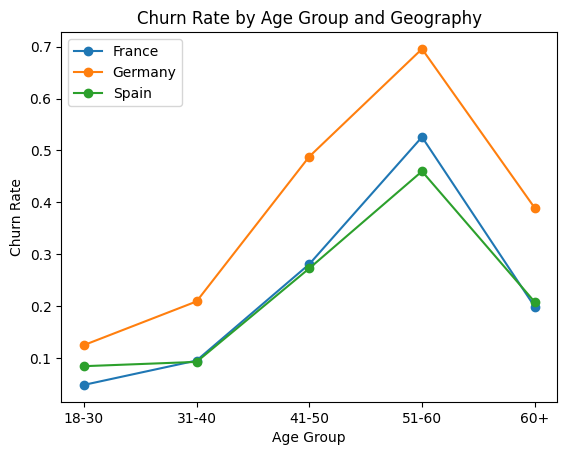

In [25]:
import matplotlib.pyplot as plt

for region in churn_age_geo["Geography"].unique():
    subset = churn_age_geo[churn_age_geo["Geography"] == region]
    plt.plot(subset["AgeGroup"], subset["Exited"], marker="o", label=region)

plt.title("Churn Rate by Age Group and Geography")
plt.xlabel("Age Group")
plt.ylabel("Churn Rate")
plt.legend()
plt.show()

In [26]:
churn_age_active = (
    df.groupby(["AgeGroup", "IsActiveMember"])["Exited"]
    .mean()
    .reset_index()
)

/tmp/ipython-input-2457172515.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["AgeGroup", "IsActiveMember"])["Exited"]


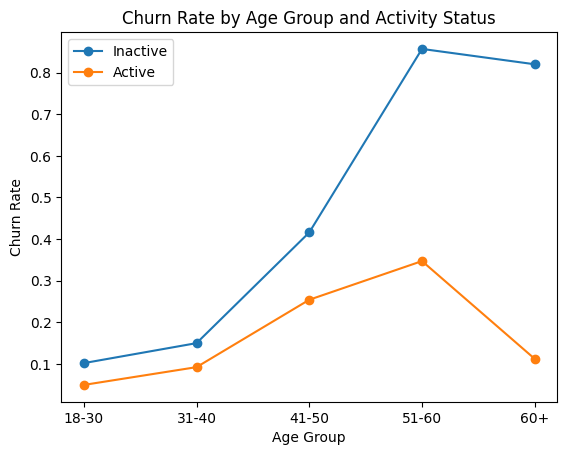

In [27]:
for status in churn_age_active["IsActiveMember"].unique():
    subset = churn_age_active[churn_age_active["IsActiveMember"] == status]
    label = "Active" if status == 1 else "Inactive"
    plt.plot(subset["AgeGroup"], subset["Exited"], marker="o", label=label)

plt.title("Churn Rate by Age Group and Activity Status")
plt.xlabel("Age Group")
plt.ylabel("Churn Rate")
plt.legend()
plt.show()

The analysis shows two strong and independent churn drivers. Germany consistently presents higher churn rates across all age groups, indicating a regional effect. Additionally, customers aged 51–60 exhibit the highest churn rates in all countries, suggesting a global age-related pattern rather than a country-specific issue.

In [32]:
# Realizando o encoding (transformando variáveis categóricas em variáveis numéricas)
X_train = pd.get_dummies(X_train, drop_first=True)
X_test = pd.get_dummies(X_test, drop_first=True)

# Alinhar as colunas de X_train e X_test
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [33]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000)

In [34]:
logreg.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [35]:
y_pred_logreg = logreg.predict(X_test)

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
accuracy_score(y_test, y_pred_logreg)

0.8155

The logistic regression model achieved an accuracy of 81.5%, serving as a baseline for further model comparison.

In [40]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred_logreg)
print(conf_matrix)

[[1550   57]
 [ 312   81]]


In [41]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_logreg)
recall = recall_score(y_test, y_pred_logreg)
f1 = f1_score(y_test, y_pred_logreg)

print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

Precision: 0.5869565217391305
Recall: 0.20610687022900764
F1-Score: 0.3050847457627119


We used Logistic Regression to predict customer churn, based on various features like age, balance, and activity status. After splitting the dataset into training and test sets, we trained the model using 80% of the data. The model achieved an accuracy of 81.5%, meaning it correctly predicted churn for 81.5% of customers in the test set.

However, the model showed low recall (21.1%), indicating it missed a significant portion of customers who actually churned. The precision was 58.7%, meaning that when the model predicted a customer would churn, it was correct about 59% of the time. The F1-score was 31%, reflecting an imbalance between precision and recall.

While the Logistic Regression model provided a solid baseline, the low recall and F1-score suggest that it struggles to identify customers who will churn. The next step would be to experiment with more complex models, like Random Forest, to see if we can improve the performance, particularly in terms of recall.

Ramdom Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [44]:
y_pred_rf = rf.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score
print("Acurácia do modelo Random Forest:", accuracy_score(y_test, y_pred_rf))


Acurácia do modelo Random Forest: 0.8655


In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Precision (Random Forest):", precision_rf)
print("Recall (Random Forest):", recall_rf)
print("F1-Score (Random Forest):", f1_rf)


Precision (Random Forest): 0.7583333333333333
Recall (Random Forest): 0.4631043256997455
F1-Score (Random Forest): 0.5750394944707741


The Random Forest model outperformed Logistic Regression across all evaluation metrics. In particular, it achieved a substantially higher recall and F1-score, indicating a better ability to identify customers at risk of churn while maintaining good precision. Therefore, Random Forest was selected as the final model for churn prediction.

This project demonstrated the complete development of a customer churn prediction pipeline, from exploratory data analysis to model evaluation. Through a thorough exploratory and bidimensional analysis, key churn patterns were identified, allowing informed decisions regarding feature selection and preprocessing. Logistic Regression was used as a baseline model, providing interpretability but limited performance in identifying churned customers. In contrast, the Random Forest model achieved superior results across all evaluation metrics, particularly recall and F1-score, indicating a better ability to capture complex and non-linear customer behavior. These results reinforce the importance of selecting models aligned with the nature of the problem, especially in behavioral prediction tasks such as churn. Overall, the project highlights how data-driven insights combined with appropriate modeling choices can effectively support customer retention strategies.